## Introduction to Independence

With a fair coin, let's say that we just tossed it five times and tails turned up all five times. Is it more likely now that we'll see heads?

The answer is no because the outcome of the tosses don't tell us anything about the outcome of a new toss. This concept is referred to as “independence".

We have actually already encountered independent events already, for example when we talked about two coin flips or two dice rolls. Now we develop theory for independent events and then, very soon, independent random variables. We build up to a concept called conditional independence, where two random variables become independent only after we condition on the value of a third random variable.

Not only is independence an important phenomenon to understand and to help us reason about many scenarios, it will also play a pivotal role in how we can represent very large probabilistic models with very little space on a computer.

## Independet Events

Two events $A$ and $B$ are independet denoted by $A \perp B$ if

$$\mathbb{P}(A \cap B) = \mathbb{p}(A) \cdot \mathbb{P}(B)$$

**Example:** If we toss two coin then probability of heads up is multiple of probability of heads for each coin. 

In terms of conditional probability we 
$$ \begin{align} 
\require{cancel}\mathbb{P}(A \cap B) &= \mathbb{p}(A) \cdot \mathbb{P}(B) \\
\cancel{\mathbb{P}(A)} \mathbb{P}(B\mid A) &= \cancel{\mathbb{P}(A)} \cdot \mathbb{P}(B) \\
\mathbb{P}(B\mid A) &= \mathbb{P}(B)
\end{align}$$
Thus if $A \perp B$ then probabiliy if $B$ given $A$ is euqal to probability of $B$.

### Exercise: Bernoulli and Bin

This problem introduces two of the most common random variables that people use in probabilistic models: the Bernoulli random variable, and the Binomial random variable. We have actually already encountered these albeit with a disguise! A Bernoulli random variable is like a biased coin flip. A Binomial random variable is like counting the number of heads for $n$ of these biased coin flips.

These two distributions appear all the time in many, many application domains that use inference! We introduce them now to equip you with some vocabulary and also to let you see our first example of a random variable whose probability table can be described by only a few numbers even if the number of entries in the table can be much larger!

As mentioned, a Bernoulli random variable is like a biased coin flip where probability of heads is $p$. In particular, a Bernoulli random variables is $1$ with probability $p$, and $0$ with probability $1−p$. If a random variable $X$ has this particular distribution, then we write $X\sim \text{Bernoulli}(p)$, where “$\sim$" can be read as “is distributed as" or “has distribution". Some people like to abbreviate $\text{Bernoulli}(p)$ by writing $\text{Bern}(p)$, $\text{Ber}(p)$, or even just $B(p)$.

A Binomial random variable can be thought of as n independent coin flips, each with probability $p$ of heads. For a random variable $S$ that has this Binomial distribution with parameters $n$ and $p$, we denote it as $S \sim \text{Binomial}(n,p)$, read as “$S$ is distributed as Binomial with parameters $n$ and $p$". Some people might also abbreviate and instead of writing $\text{Binomial}(n,p)$, they write $\text{Binom}(n,p)$ or $\text{Bin}(n,p)$.

(a) True or false: If $Y \sim \text{Binomial}(n,p)$, then $Y$ is a Bernoulli random variable.

**Answer:** FALSE

(b) Let's say we have a coin that turns up heads with probability $0.6$. We flip this coin $10$ times. What is the probability of seeing the sequence HTHTTTTTHH, where H denotes heads and T denotes tails (so we have heads in the first toss, tails in the second, heads in the third, etc)? (Please be precise with at least 3 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

In [28]:
sequence = "HTHTTTTTHH"
model = {'H': 0.6, 'T': 0.4}
prob = 1
for char in sequence:
    prob *= model[char]
    
prob    

0.0005308416000000001

(c) In the previous part, there were 4 heads and 6 tails. Did the ordering of them matter? In other words, would your answer to the previous part be the same if, for example, instead we saw the sequence HHHHTTTTTT (or any other permutation of 4 heads and 6 tails)?

[$\checkmark$] The probability stays the same so long as we have 4 heads and 6 tails. <br>
[$\times    $] The probability is different depending on the ordering of heads and tails.

(d) From the previous two parts, what we were analyzing was the same as the random variable $S \sim \text{Binomial}(10,0.6)$. Note that $S=4$ refers to the event that we see exactly 4 heads. Note that HTHTTTTTHH and HHHHTTTTTT are different outcomes of the underlying experiment of coin flipping. How many ways are there to see 4 heads in 10 tosses? (Please provide the exact answer.)

In [29]:
def ncr(n, r):
    """
    If calculates the n choose r for n >= r.
    
    >>> ncr(10, 4)
    210.0
    
    >>> ncr(4, 4)
    1.0
    """
    from scipy.misc import factorial 
    return factorial(n) // (factorial(r) * factorial(n-r))
    
if __name__ == "__main__":
    import doctest 
    doctest.testmod()

In [30]:
ncr(10, 4)

210.0

(e) Using your answers to parts (b) through (d), what is the probability that $S=4$? (Please be precise with at least 3 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

In [22]:
prob * ncr(10, 4)

0.11147673600000002

In general, for a random variable $S \sim \text{Binomial}(n,p)$, the reasoning used in parts (b) through (e) could be used to obtain the probability that $S=s$ for any $s∈\{0,1,2,…,n\}$. Importantly, what this means is that by just specifying two numbers $n$ and $p$, we know the full probability table for random variable $S$, which has $n+1$ entries! This is an example of where we could have many probability table entries yet we can fully specify the entire table using fewer numbers than the number of entries in the table.

Please be sure to look at the solution to this problem after you have finished it to see the general equation for what the probability table entry $p_S(s)$ is, and also why the probability table entries sum to $1$.

### Exercise: The Soda Machine
3 points possible (graded)
A soda machine advertises 7 different flavors of soda. However, there is only one button for buying soda, which dispenses a flavor of the machine's choosing. Adam buys 14 sodas today, and notices that they are all either grape or root beer flavored.

(a) Assuming that the soda machine actually dispenses each of its 7 flavors randomly, with equal probability, and independently each time, what is the probability that all 14 of Adam's sodas are either grape or root beer flavored? (Please be precise with at least 10 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

In [31]:
(2/7)**14

2.4157243620710218e-08

(b) How would your answer to the (a) change if the machine were out of diet cola, ginger ale, so it randomly chooses one of only 5 flavors? (Please be precise with at least 10 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

In [32]:
(2/5)**14

2.684354560000002e-06

(c) What if the machine only had 3 flavors: grape, root beer, and cherry? (Please be precise with at least 10 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

In [33]:
(2/3)**14

0.003425487390781748

### Exercise: Gambler's Fallacy

Suppose you have a 27-sided fair die (with faces numbered $1,2,\ldots ,27$) that you get to roll 100 times. You win a prize if you roll 27 at least once. In this problem we look at what happens if you don't roll 27 for a while and see whether or not you're more likely to roll a 27 in your remaining rolls.

(a) What is the probability that you roll 27 at least once out of the 100 rolls? (Please be precise with at least 3 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

In [50]:
1 - (26/27)**100

0.9770407138326136

(b) Suppose you roll the die once and don't get 27. What is the probability that of the remaining 99 rolls, you will roll 27 at least once? (Please be precise with at least 3 decimal places, unless of course the answer doesn't need that many decimal places. You could also put a fraction.)

In [51]:
1 - (26/27)**99

0.9761576643646371

(c) Suppose you roll the die n times and don't get 27 any of those times. What is the probability that of the remaining $100−n$ rolls, you will roll 27 at least once? Express your answer in terms of n.

In this part, please provide your answer as a mathematical formula (and not as Python code). Use $\hat{}$ for exponentiation, e.g., $x\hat{} 2$ denotes $x^2$. Explicitly include multiplication using $*$, e.g. $x*y$ is $xy$.

In [52]:
1 - (26/27)**(100-n)

0.9770407138326136

(d) Plot the probability in part (c) as a function of $n$ for $n=1,2,…,99$. Does this probability increase or decrease as n increases?

[$\checkmark$] Probability decreases as $n$ increases <br>
[$\times    $] Probability increases as $n$ increases

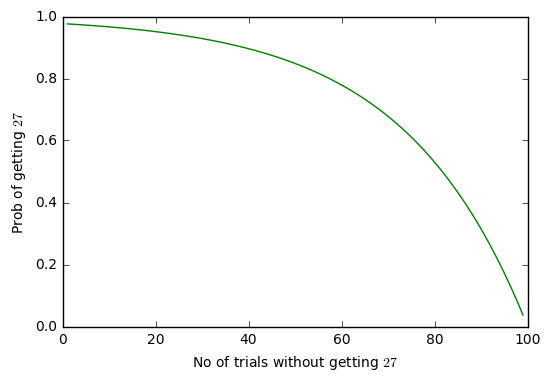

In [60]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 100)]
y = [1 - (26/27)**(100-n) for n in x]

plt.plot(x, y, 'g')
plt.xlabel("No of trials without getting $27$")
plt.ylabel("Prob of getting $27$")
plt.show()

## Independet Random Variable

Two random variable $X$ and $Y$ are independent denoted by $X \perp Y$, if the joint probability distribution $p_{X,Y}$ is given by 

$$p_{X,Y} (x,y) = p_X(x)\, p_Y(y) \quad \forall x,y$$

Indepence roughly means "knowing one we have no information about other". Also in terms of conditioanl probability 

$$p_{X\mid Y}(x\mid y) = p_X(x) $$

### Exercise: Independent Random Variables

In this exercise, we look at how to check if two random variables are independent in Python. Please make sure that you can follow the math for what's going on and be able to do this by hand as well.

Consider random variables $W, I, X$, and $Y$, where we have shown the joint probability tables $p_{W,I}$ and $p_{X,Y}$.

<img src="../images/images_sec-joint-rv-ex-marg.png" rel="drawing" width=400>

In Python:
```python
prob_W_I = np.array([[1/2, 0], [0, 1/6], [0, 1/3]])
```
Note that here, we are not explicitly storing the labels, but we'll keep track of them in our heads. The labels for the rows (in order of row index): sunny, rainy, snowy. The labels for the columns (in order of column index): 1, 0.

We can get the marginal distributions $p_W$ and $p_I$:
```python
prob_W = prob_W_I.sum(axis=1)
prob_I = prob_W_I.sum(axis=0)
```
Then if $W$ and $I$ were actually independent, then just from their marginal distributions $p_W$ and $p_I$, we would be able to compute the joint distribution with the formula:

$$p_{W,I}(w,i)=p_W(w)\, p_I(i) \quad \forall ~w,i.$$
 
Note that variables `prob_W` and `prob_I` at this point store the probability tables $p_W$ and $p_I$ as 1D NumPy arrays, for which NumPy does not store whether each of these should be represented as a row or as a column.

We could however ask NumPy to treat them as column vectors, and in particular, taking the outer product of `prob_W` and `prob_I` yields what the joint distribution would be if $W$ and $I$ were independent:

$$\begin{eqnarray}
\begin{bmatrix}
p_W(\text{sunny}) \\
p_W(\text{rainy}) \\
p_W(\text{snowy})
\end{bmatrix}
\begin{bmatrix}
p_I(1) & p_I(0)
\end{bmatrix}
=
\begin{bmatrix}
p_W(\text{sunny})p_I(1) & p_W(\text{sunny})p_I(0) \\
p_W(\text{rainy})p_I(1) & p_W(\text{rainy})p_I(0) \\
p_W(\text{snowy})p_I(1) & p_W(\text{snowy})p_I(0)
\end{bmatrix}.
\end{eqnarray}$$

The left-hand side is an outer product, and the right-hand side is precisely the joint probability table that would result if $W$ and $I$ were independent.

To compute and print the right-hand side, we do:
```python
print(np.outer(prob_W, prob_I))
```
**Question:** Are $W$ and $I$ independent (compare the joint probability table we would get if they were independent with their actual joint probability table)?

**Question:** Are X and Y independent?

## Mutual and Pairwise Independence 

Three random variable $X, Y$ and $Z$ are `mutually independent` if 

$$p_{X,Y,Z} = p_X(x) \, p_Y(y) \, p_Z(z) $$

Three random variable $X,Y$ and $Z$ are `pairwise independence` if 

$$p_{I,J} = p_I \, p_J \quad \forall ~I,J \in \{X,Y,Z\}, I\neq J$$

### Exercise: Mutual vs Pairwise Independence

Suppose random variables $X$ and $Y$ are independent, where $X$ is $1$ with probability $1/2$, and $-1$ otherwise. Similarly, $Y$ is also $1$ with probability $1/2$, and $-1$ otherwise. In this case, we say that $X$ and $Y$ are identically distributed since they have the same distribution (remember, just because they have the same distribution doesn't mean that they are the same random variable — here $X$ and $Y$ are independent!). Note that often in this course, we'll be seeing random variables that are independent and identically distributed (i.i.d.).

Suppose we have another random variable $Z$ that is the product of $X$ and $Y$, i.e., $Z=XY$.

Select all of the following that are true:

[$\times$] The distributions $p_X, p_Y$, and $p_Z$ are the same. <br>
[$\times$] The joint distributions $p_{X,Y}, p_{X,Z}$, and $p_{Y,Z}$ are the same. <br>
[$\times$] $X, Y$, and $Z$ are pairwise independent.<br>
[$\times$] $X, Y$, and $Z$ are mutually independent.<br>